Copyright **`(c)`** 2021 Giovanni Squillero `<squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see 'LICENCE.md' for details.

In [1]:
import logging
import random
import networkx as nx
import matplotlib.pyplot as plt

logging.basicConfig(format='[%(asctime)s] %(levelname)s: %(message)s', datefmt='%H:%M:%S', level=logging.INFO)

In [2]:
def get_pairs(sequence):
    seq = sequence[:]
    e2 = seq.pop(0)
    seq.append(e2)
    while seq:
        e1 = e2
        e2 = seq.pop(0)
        yield (e1, e2)

In [22]:
NUM_CITIES = 20

GRAPH = nx.DiGraph()
for c in range(NUM_CITIES):
    GRAPH.add_node(c, pos=(random.random(), random.random()))

def evaluate_solution(solution):
    total_cost = 0
    for n1, n2 in get_pairs(solution):
        n1 = GRAPH.nodes[n1]['pos']
        n2 = GRAPH.nodes[n2]['pos']
        total_cost += (n1[0]-n2[0])**2 + (n1[1]-n2[1])**2
    return round(1_000_000 / (NUM_CITIES+1) * total_cost)

def plot_solution(solution=None):
    if solution:
        GRAPH.remove_edges_from(list(GRAPH.edges))
        for n1, n2 in get_pairs(solution):
            GRAPH.add_edge(n1, n2)
    plt.figure(figsize=(15, 5))
    nx.draw(GRAPH, pos=nx.get_node_attributes(GRAPH, 'pos'), with_labels=True, node_color='pink')

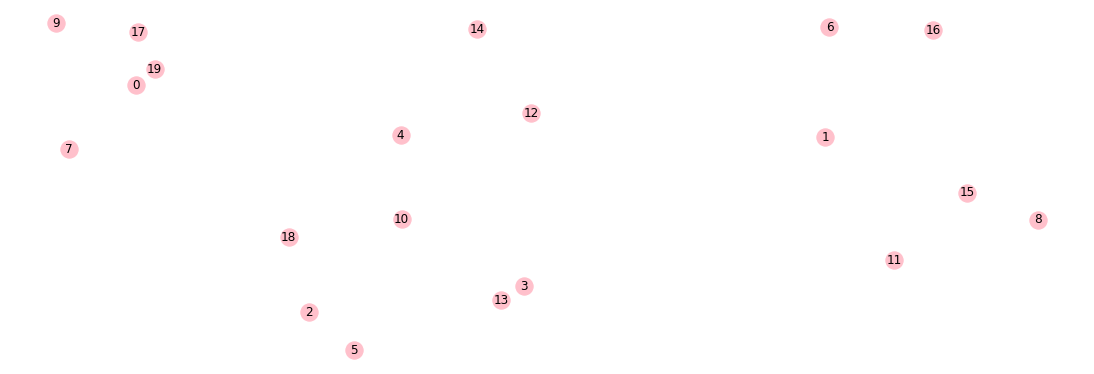

In [23]:
plot_solution()

Solution cost: 403,510


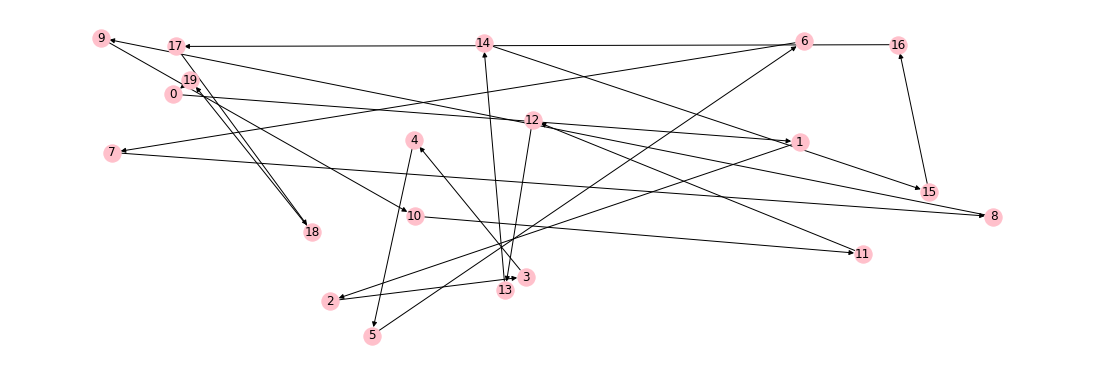

In [25]:
sol = list(range(NUM_CITIES))
plot_solution(sol)
print(f"Solution cost: {evaluate_solution(sol):,}")